In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [5]:
from langchain_upstage import ChatUpstage

query = '인프런에는 어떤 강의가 있나요?'

llm = ChatUpstage(model='solar-pro2')
llm.invoke(query)

AIMessage(content='인프런(Inflearn)은 다양한 분야의 온라인 강의를 제공하는 플랫폼으로, 주로 **개발, 데이터 과학, 디자인, 마케팅, 금융, 취미** 등 실용적인 스킬 업을 위한 콘텐츠가 풍부합니다. 현재(2024년 7월) 인기 있는 강의 카테고리와 대표적인 강의는 다음과 같습니다:\n\n---\n\n### **1. 개발 & 프로그래밍**\n- **웹 개발**:  \n  - "자바스크립트로 배우는 웹 개발 입문"  \n  - "리액트(React) 실전 가이드"  \n  - "스프링 부트로 혼자 개발하는 웹 서비스"  \n- **데이터 과학 & AI**:  \n  - "파이썬으로 배우는 데이터 분석"  \n  - "머신러닝 입문자를 위한 텐서플로우/케라스 강의"  \n  - "SQL 데이터베이스 마스터 클래스"  \n- **모바일 앱 개발**:  \n  - "플러터로 시작하는 앱 개발"  \n  - "안드로이드 Kotlin 개발 과정"  \n- **백엔드 & 인프라**:  \n  - "AWS로 배우는 클라우드 서버 구축"  \n  - "Docker와 Kubernetes로 시작하는 DevOps"  \n\n---\n\n### **2. 디자인**\n- **UI/UX 디자인**:  \n  - "Figma로 배우는 UX/UI 디자인"  \n  - "애프터 이펙트로 만드는 모션 그래픽"  \n- **일러스트 & 포토샵**:  \n  - "프로크리에이트로 그리는 캐릭터 디자인"  \n\n---\n\n### **3. 비즈니스 & 마케팅**\n- **디지털 마케팅**:  \n  - "구글 애널리틱스 실전 활용법"  \n  - "메타(페이스북) 광고 전략"  \n- **기획 & 생산성**:  \n  - "노션(Notion)으로 업무 효율화"  \n  - "스타트업 비즈니스 모델 설계"  \n\n---\n\n### **4. 금융 & 투자**\n- "주식 투자 첫걸음"  \n- "블록체인 이해와 암호화폐 분석"  \n\n---\n\n### **5. 취미 & 

In [6]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]

In [7]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [8]:
def generate(state: AgentState) -> AgentState:
    messages = state['messages']
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}

In [9]:
from langgraph.graph import START, END

graph_builder.add_node('generate', generate)
graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

In [10]:
graph = graph_builder.compile()


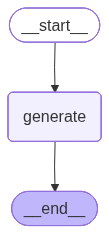

In [11]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
from langchain_core.messages import HumanMessage

initial_state = {'messages': [HumanMessage(content=query)]}
graph.invoke(initial_state)

{'messages': [AIMessage(content='인프런(Inflearn)은 다양한 분야의 온라인 강의를 제공하는 플랫폼으로, 주로 **개발, 데이터 과학, 디자인, 마케팅, 비즈니스** 등의 주제를 다룹니다. 2024년 기준으로 인기 있는 강의 카테고리와 예시를 안내해 드리겠습니다. (참고: 강의 목록은 지속적으로 업데이트되므로 최신 정보는 인프런 사이트에서 확인하시는 것이 좋습니다.)\n\n---\n\n### **1. 개발/프로그래밍**\n- **웹 개발**:  \n  - "자바스크립트로 배우는 웹 개발의 정석"  \n  - "리액트(React) 공식 문서로 제대로 배우기"  \n  - "스프링 부트(Spring Boot)로 시작하는 웹 개발"  \n- **모바일 개발**:  \n  - "플러터(Flutter)로 안드로이드 & iOS 앱 개발"  \n  - "스위프트(Swift)로 만드는 iOS 앱"  \n- **백엔드/인프라**:  \n  - "AWS로 배우는 클라우드 서버 구축"  \n  - "도커(Docker)와 쿠버네티스(Kubernetes) 입문"  \n- **언어별 강의**:  \n  - 파이썬(Python), 자바(Java), C++, Go 언어 등 기초부터 심화까지.\n\n---\n\n### **2. 데이터 과학/AI**\n- "파이썬으로 배우는 데이터 분석 & 시각화"  \n- "머신러닝 입문: 개념부터 실습까지"  \n- "텐서플로(TensorFlow)를 이용한 딥러닝"  \n- "SQL과 데이터베이스 설계"  \n\n---\n\n### **3. 디자인/UI·UX**\n- "피그마(Figma)로 배우는 UX/UI 디자인"  \n- "어도비 일러스트레이터(Adobe Illustrator) 마스터"  \n- "UX 리서치 & 프로토타이핑"  \n\n---\n\n### **4. 마케팅/비즈니스**\n- "구글 애널리틱스(GA4)로 데이터 분석"  \n- "디지털 마케팅 전략 A to Z"  \n- "스타트업 창업과 비즈니스 모델 설계"